# Modelos de Terman y Rubin para neuronas del STN y GPe

Implementados por NESTML.

In [1]:
# nest 
import nest
import nest.voltage_trace
from pynestml.frontend.pynestml_frontend import generate_nest_target


# gráficas
import matplotlib.pyplot as plt

# cálculo
from scipy import stats as st
from scipy import signal
from random import randint
import numpy as np

NEST_SIMULATOR_INSTALL_LOCATION = nest.ll_api.sli_func('statusdict/prefix ::')

nest.set_verbosity('M_WARNING')
nest.ResetKernel()


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: UNKNOWN
 Built: Apr 14 2022 16:45:38

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



## Crear y cargar modelo STN

In [2]:
generate_nest_target(input_path='models/terub_stn.nestml',
                     target_path='/tmp/terub_stn',
                     logging_level='ERROR',
                     module_name='terub_stn_module',
                     codegen_opts={'nest_path': NEST_SIMULATOR_INSTALL_LOCATION})



-- The CXX compiler identification is GNU 9.4.0
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done

-------------------------------------------------------
terub_stn_module Configuration Summary
-------------------------------------------------------

C++ compiler         : /usr/bin/c++
Build static libs    : OFF
C++ compiler flags   : 
NEST compiler flags  :  -O2 -std=c++11 -Wall -fopenmp -pthread -fdiagnostics-color=auto
NEST include dirs    :  -I/opt/nest/include/nest -I/usr/include -I/usr/include -I/usr/include -I/opt/music-install/include -I/usr/lib/x86_64-linux-gnu/openmpi/include/openmpi -I/usr/lib/x86_64-linux-gnu/openmpi/include -I/usr/include
NEST libraries flags : -L/opt/nest/lib/nest -lnestutil -lnest -lsli -lnestkernel -fopenmp /usr/lib/x86_64-linux-gnu/libltdl.so /usr

In [3]:
nest.Install('terub_stn_module')

## Crear y cargar modelo GPe

In [4]:
generate_nest_target(input_path='models/terub_gpe.nestml',
                    target_path='/tmp/terub_gpe',
                     logging_level='ERROR',
                     module_name='terub_gpe_module',
                     codegen_opts={'nest_path': NEST_SIMULATOR_INSTALL_LOCATION})

-- The CXX compiler identification is GNU 9.4.0
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done

-------------------------------------------------------
terub_gpe_module Configuration Summary
-------------------------------------------------------

C++ compiler         : /usr/bin/c++
Build static libs    : OFF
C++ compiler flags   : 
NEST compiler flags  :  -O2 -std=c++11 -Wall -fopenmp -pthread -fdiagnostics-color=auto
NEST include dirs    :  -I/opt/nest/include/nest -I/usr/include -I/usr/include -I/usr/include -I/opt/music-install/include -I/usr/lib/x86_64-linux-gnu/openmpi/include/openmpi -I/usr/lib/x86_64-linux-gnu/openmpi/include -I/usr/include
NEST libraries flags : -L/opt/nest/lib/nest -lnestutil -lnest -lsli -lnestkernel -fopenmp /usr/lib/x86_64-linux-gnu/libltdl.so /usr/l

In [5]:
nest.Install('terub_gpe_module')

## Pruebas sobre las neuronas

### STN

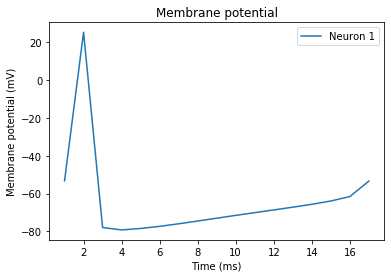

In [6]:
n = nest.Create('terub_gpe')

spikegenerator = nest.Create('spike_generator')
voltmeter = nest.Create('voltmeter')
spikegenerator.set(spike_times=[10.0])

nest.Connect(spikegenerator, n, syn_spec={'weight': 0})
nest.Connect(voltmeter, n)

nest.Simulate(100.0)

nest.voltage_trace.from_device(voltmeter)
plt.show()

### GPe

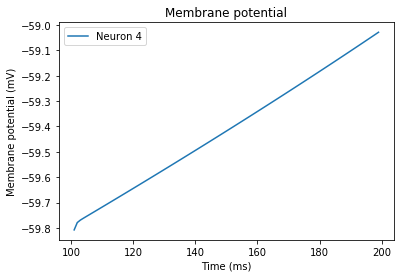

In [7]:
n = nest.Create("terub_stn")

spikegenerator = nest.Create('spike_generator')
voltmeter = nest.Create('voltmeter')
spikegenerator.set(spike_times=[10.0])

nest.Connect(spikegenerator, n, syn_spec={'weight': 0})
nest.Connect(voltmeter, n)

nest.Simulate(100.0)

nest.voltage_trace.from_device(voltmeter)
plt.show()